<h1 align='center'> <b> ANALYZING CUSTOMER SHOPPING DATA ON E-COMMERCE PLATFORMS -

 PHÂN TÍCH DỮ LIỆU MUA SẮM CỦA KHÁCH HÀNG TRÊN CÁC NỀN TẢNG THƯƠNG MẠI ĐIỆN TỬ  </b> </h1>

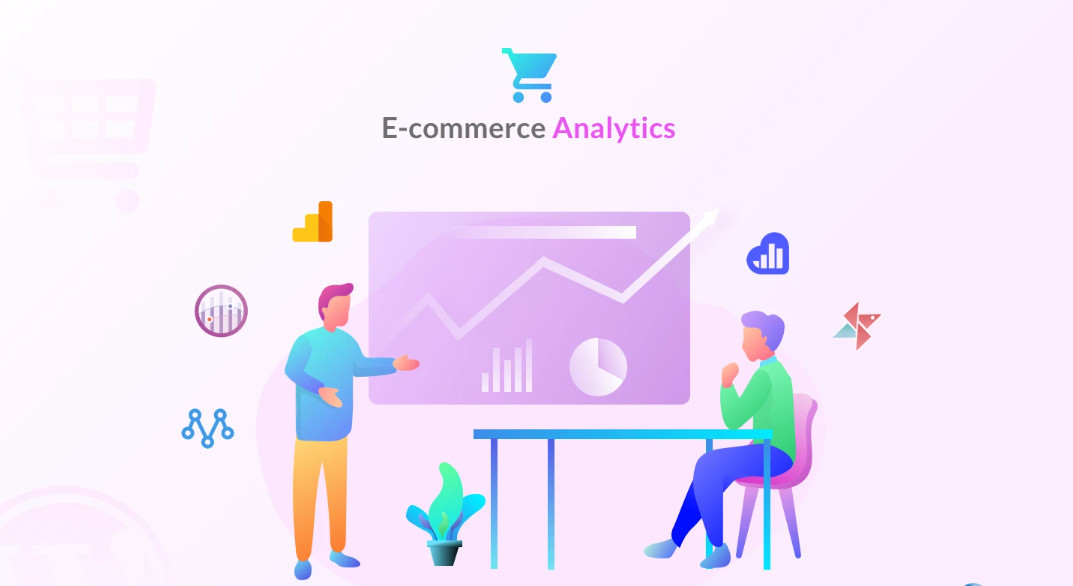

In [ ]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
from google.colab import drive
import matplotlib
import datetime

drive.mount('/content/drive')

Mounted at /content/drive


In [ ]:
# Loading dataset
file_path = "/content/drive/MyDrive/Sample_Customore_Order raw.xlsx"
sheet_name = "raw"
df1 = pd.read_excel(file_path, sheet_name=sheet_name)

- Tập dữ liệu có 61728 samples và 11 features.

#Tổng quan về thông tin mua sắm của khách hàng

In [ ]:
df1.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 61728 entries, 0 to 61727
Data columns (total 11 columns):
 #   Column                 Non-Null Count  Dtype         
---  ------                 --------------  -----         
 0   customer_unique_id     61728 non-null  int64         
 1   order_id               61728 non-null  object        
 2   item_quantity          61728 non-null  int64         
 3   created_day            61728 non-null  datetime64[ns]
 4   onsite_original_price  61728 non-null  int64         
 5   selling_price          61728 non-null  int64         
 6   shipping_fee           61728 non-null  int64         
 7   voucher_platform       61728 non-null  int64         
 8   voucher_seller         61728 non-null  int64         
 9   payment_method         61728 non-null  object        
 10  order_status           61728 non-null  object        
dtypes: datetime64[ns](1), int64(7), object(3)
memory usage: 5.2+ MB


Nhận xét:
- Tập dữ liệu có 1 feature time series (created_day), 3 features kiểu categorical (order_id, payment_method, order_status) và 7 features kiểu numerical.
- Tập dữ liệu không chứa giá trị NULL.

In [ ]:
for column in df1.columns:
    unique_values = df1[column].unique()
    print(f"{column}: {len(unique_values)}")

customer_unique_id: 30513
order_id: 37835
item_quantity: 20
created_day: 27
onsite_original_price: 188
selling_price: 182
shipping_fee: 462
voucher_platform: 1
voucher_seller: 1
payment_method: 32
order_status: 2


In [ ]:
#Categorical feature
df1.describe(include=['object'])

,order_id,payment_method,order_status
count,61728,61728,61728
unique,37835,32,2
top,A000016064,Cash on Delivery,COMPLETED
freq,17,53988,49717


Trong tháng 7/2019 ghi nhận:
- **37835** đơn hàng được đặt. Trong đó đơn hàng được đặt nhiều nhất có ID **A000016064** với **17** sản phẩm.
- **32** phương thức thanh toán được sử dụng, phổ biến nhất là **Cash on Delivery** (COD - trả tiền thông qua đơn vị vận chuyển).
- **02** tình trạng của đơn đặt hàng với **COMPLETED** chiếm phần lớn.

In [ ]:
#Numerical feature
df1.describe()

,customer_unique_id,item_quantity,onsite_original_price,selling_price,shipping_fee,voucher_platform,voucher_seller
count,61728.000000,61728.000000,6.172800e+04,6.172800e+04,61728.000000,61728.0,61728.0
mean,14323.092260,1.111748,2.347072e+05,1.514818e+05,11191.105689,0.0,0.0
std,8050.804821,1.487318,1.574884e+05,1.178384e+05,16157.498442,0.0,0.0
min,1.000000,1.000000,1.000000e+03,0.000000e+00,0.000000,0.0,0.0
25%,7954.000000,1.000000,1.500000e+05,8.900000e+04,0.000000,0.0,0.0
50%,13852.500000,1.000000,1.950000e+05,1.250000e+05,3000.000000,0.0,0.0
75%,20361.250000,1.000000,2.580000e+05,1.790000e+05,16000.000000,0.0,0.0
max,30513.000000,198.000000,1.750000e+06,1.579000e+06,384500.000000,0.0,0.0


Trong tháng 7/2019:
- Tổng cộng có **30513** khách hàng mua sắm trên toàn sàn thương mại.
- Trung bình số lượng sản phẩm trong mỗi đơn hàng là** 1**, cao nhất là **198**.
- Giá niêm yết của các sản phẩm trên sàn thương mại điện tử từ **1.000 - 1.750.000** đồng, trung bình khoảng **235.000** đồng/sản phẩm.
- Giá bán dao động từ **0 - 1.579.000** đồng, trung bình ~**150.000** đồng/sản phẩm.
- Phí giao hàng trung bình ~**12.000** đồng. Tuy nhiên có đơn hàng với phí giao hàng rất lớn ~**400.000** đồng.
- Trong tập dữ liệu thu thập được cho thấy không có loại voucher nào được sử dụng (platform & seller). Tuy nhiên ở đây hiểu rằng phần chênh lệch giữa giá niêm yết và giá bán cho khách hàng chính là phần khuyến mãi đã được áp dụng.


# Về khách hàng

Percent outliers: 11.798535510627268%


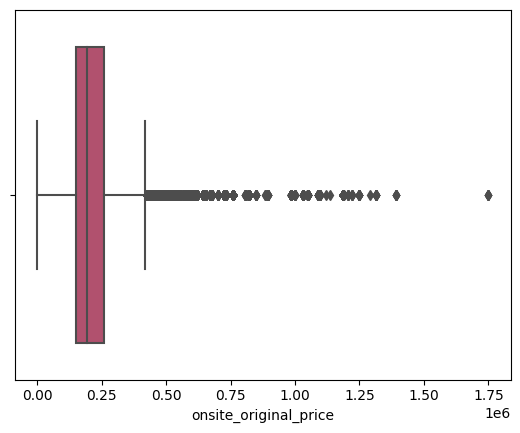

In [ ]:
#onsite original price
sns.boxplot(x=df1['onsite_original_price'], palette='flare')
threshold = 400000
outliers = df1[df1['onsite_original_price'] > threshold]
percentage_outliers = (len(outliers) / len(df1)) * 100
print(f"Percent outliers: {percentage_outliers}%")

Khách hàng mua sắm:
- Trung bình các sản phẩm vào ~**250.000** đồng.
- Lấy ngưỡng > 400.000 đồng/sản phẩm làm giá trị để xem xét là các đơn hàng có giá trị cao (ngoại lai) thì có ~**12**%.

Percent outliers: 10.118584758942458%


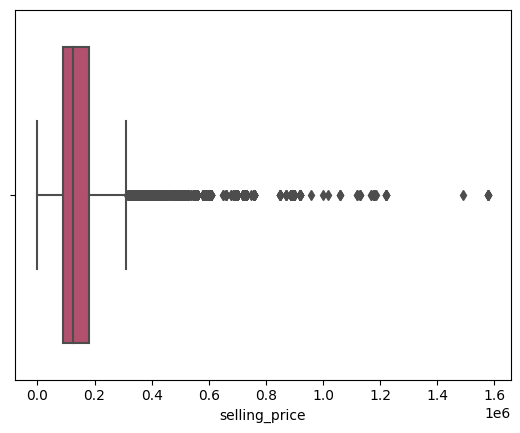

In [ ]:
#Selling price
sns.boxplot(x=df1['selling_price'], palette='flare')
threshold = 300000
outliers = df1[df1['selling_price'] > threshold]
percentage_outliers = (len(outliers) / len(df1)) * 100
print(f"Percent outliers: {percentage_outliers}%")

- Tương tự, trung bình giá các sản phẩm bán ra ~ **150.000** đồng/sản phẩm.
- Lấy ngưỡng > 300.000/sản phẩm làm giá trị để xem xét là các đơn hàng có giá trị cao (ngoại lai) thì có ~**10**%. Đây cũng là **nhóm các khách hàng giá trị cao** cần được tập trung và đẩy mạnh hơn.

In [ ]:
#Average difference value between selling price and onsite original price
df1['difference'] = abs(df1['selling_price'] - df1['onsite_original_price'])
average_difference = df1['difference'].mean()
print(f"Average difference value: {average_difference}")

Average difference value: 83225.39074650078


Nhận xét:
- Chênh lệch giữa giá niêm yết và giá bán ra ~83.000 đồng. Có thể xem xét điều chỉnh mức chênh lệch này vào từng thời điểm để có được doanh thu và lợi nhuận cao nhất.

### Nhóm khách hàng giá trị cao

In [ ]:
order_count_series = df1['order_id'].value_counts()
top_customer = df1[df1['order_id'].isin(order_count_series[order_count_series >= 5].index) | (df1['selling_price'] > 300000)]
top_customer

,customer_unique_id,order_id,item_quantity,created_day,onsite_original_price,selling_price,shipping_fee,voucher_platform,voucher_seller,payment_method,order_status,difference,order_status_encode,Day,Dayofweek
2,3,A000000003,1,2019-07-01,520000,359000,14927,0,0,Cybersource,COMPLETED,161000,0,1,Monday
17,16,A000000017,1,2019-07-01,321000,259000,24500,0,0,Other,COMPLETED,62000,0,1,Monday
18,17,A000000018,1,2019-07-01,582000,399000,0,0,0,Cash on Delivery,COMPLETED,183000,0,1,Monday
22,21,A000000022,1,2019-07-01,645000,429000,10000,0,0,Cybersource,COMPLETED,216000,0,1,Monday
26,25,A000000026,1,2019-07-01,734000,529000,0,0,0,Airpay GIRO,COMPLETED,205000,0,1,Monday
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
61705,30503,A000037817,1,2019-07-30,650000,379000,0,0,0,Cash on Delivery,COMPLETED,271000,0,30,Tuesday
61707,30505,A000037819,1,2019-07-30,465000,329000,0,0,0,Cash on Delivery,COMPLETED,136000,0,30,Tuesday
61708,30506,A000037820,1,2019-07-30,516000,319000,0,0,0,Other,COMPLETED,197000,0,30,Tuesday
61718,30510,A000037827,1,2019-07-30,492000,389000,0,0,0,Cash on Delivery,COMPLETED,103000,0,30,Tuesday


<Axes: xlabel='Day', ylabel='count'>

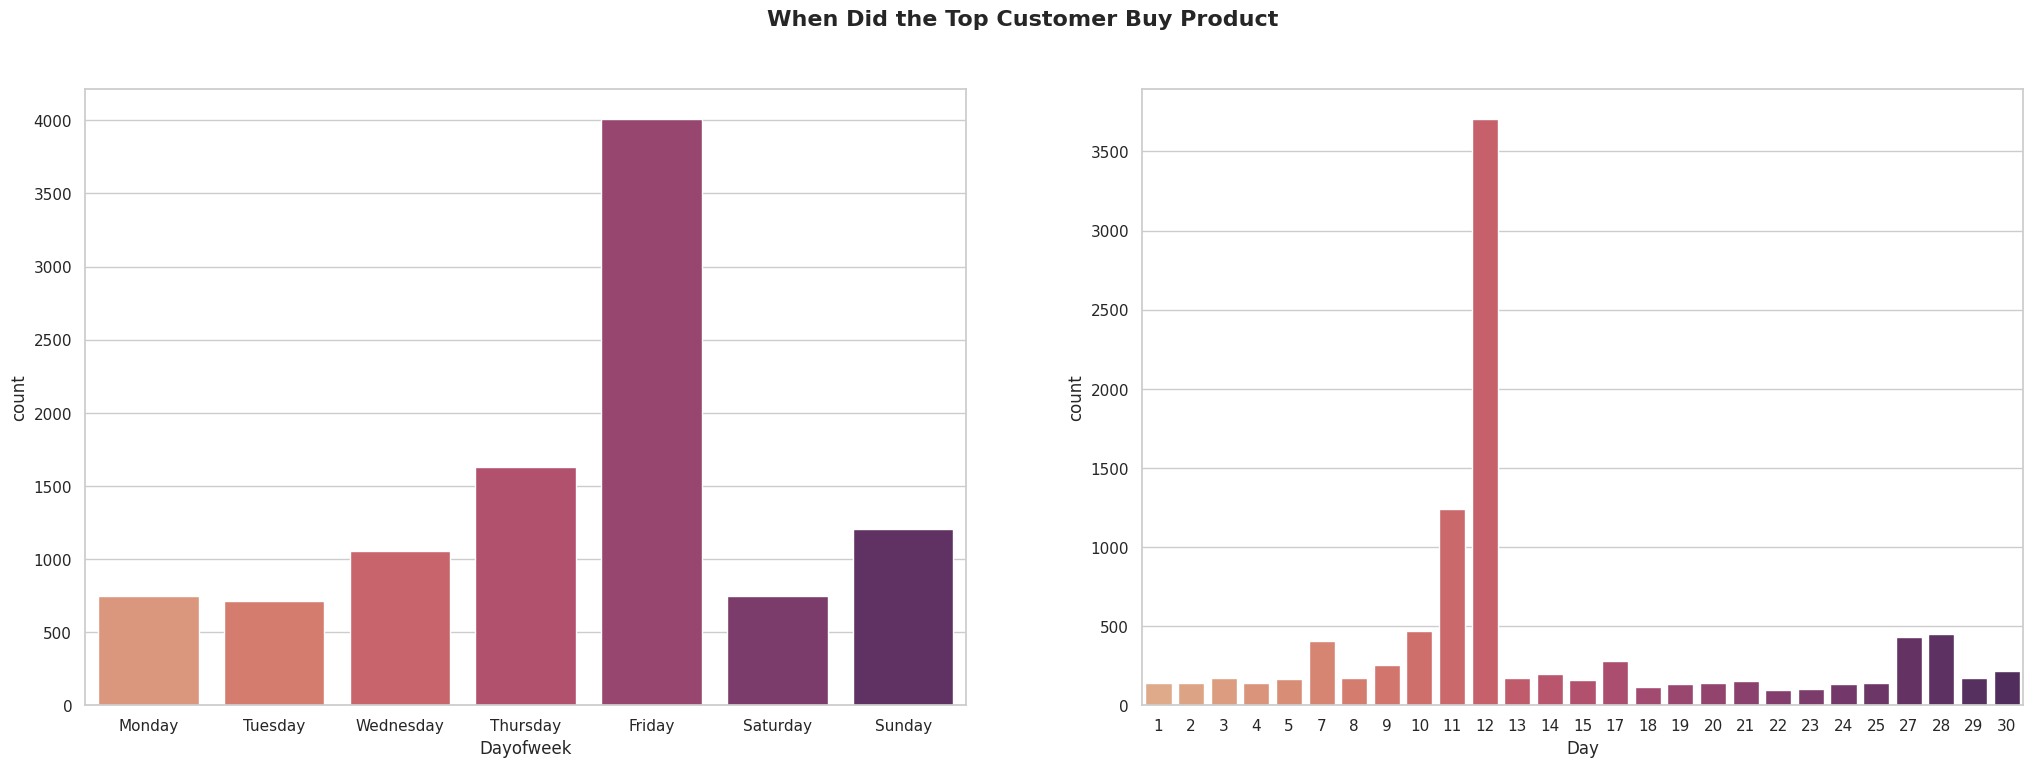

In [ ]:
fig, axes = plt.subplots(1, 2, figsize=(25,8))
axes = axes.flatten()
fig.suptitle("When Did the Top Customer Buy Product", weight='bold', fontsize=16)
sns.countplot(x=top_customer['Dayofweek'], order=['Monday', 'Tuesday', 'Wednesday', 'Thursday', 'Friday','Saturday', 'Sunday'], palette='flare', ax=axes[0])
sns.countplot(x=top_customer['Day'], palette='flare', ax=axes[1])

- Nhóm khách hàng có giá trị cao thường mua hàng vào ngày thứ 5 và thứ 6.
- Giao dịch nhiều vào các ngày 11, 12, 27 28 của tháng.

In [ ]:
status = top_customer.order_status.value_counts()
COMPLETED = status[['COMPLETED']].sum()
CANCELLED = status[['CANCELLED']].sum()
print('Percentage of canceled orders', CANCELLED*100/(CANCELLED+COMPLETED))

Percentage of canceled orders 18.638702018203404


- Nhóm khách hàng này có tỷ lệ hủy đơn hàng khoảng ~20%. Đây là những khách hàng có giá trị đơn đặt hàng rất cao, cần xem xét thêm các yếu tố khiến đơn hàng bị hủy để giảm tỷ lệ xuống mức thấp nhất nhằm tăng tối đa doanh thu.

# Về phí giao hàng

Percent outliers: 5.781817003628823%


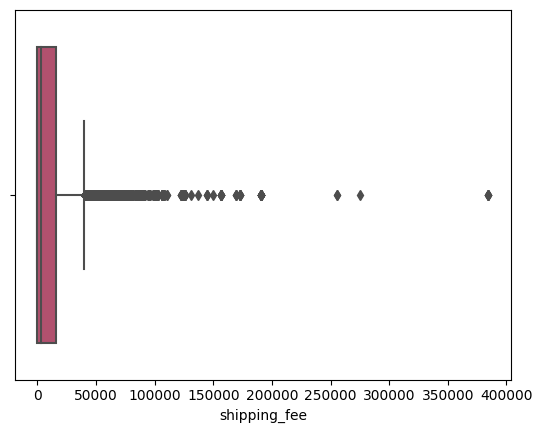

In [ ]:
#Shipping_fee
sns.boxplot(x=df1['shipping_fee'], palette='flare')
threshold = 40000
outliers = df1[df1['shipping_fee'] > threshold]
percentage_outliers = (len(outliers) / len(df1)) * 100
print(f"Percent outliers: {percentage_outliers}%")

- Trung bình phí giao hàng ~10.000 đồng/đơn hàng.
- Có các đơn hàng phí ship rất cao từ 200.000 - 400.000 đồng/ đơn hàng.
- Các phí ship cao (>40.000 đồng) chiếm tỷ lệ rất nhỏ khoảng 6%.

# Về đơn hàng

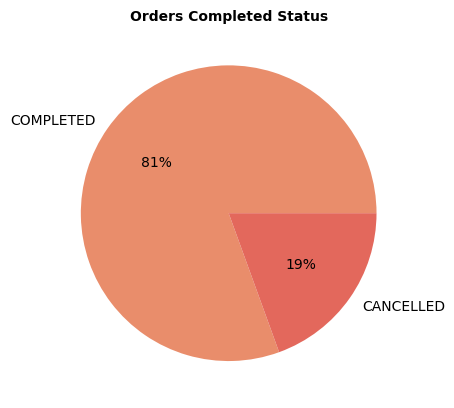

In [ ]:
#Order status
status = df1.order_status.value_counts()
COMPLETED = status[['COMPLETED']].sum()
CANCELLED = status[['CANCELLED']].sum()
plt.title('Orders Completed Status', weight='bold', fontsize=10)
palette = sns.color_palette('flare')
plt.pie([COMPLETED, CANCELLED], labels = ['COMPLETED', 'CANCELLED'], colors = palette, autopct='%.0f%%');

- Tỷ lệ đơn hàng bị hủy chiếm đến 19%.

In [ ]:
df1['order_status_encode'] = df1['order_status'].apply(lambda x: 0 if x == 'COMPLETED' else 1)
correlation = df1['shipping_fee'].corr(df1['order_status_encode'])
print(f"Correlation coefficient between 'shipping_fee' and 'order_status': {correlation}")

Correlation coefficient between 'shipping_fee' and 'order_status': 0.12007559568518919


Nhận xét:
- Từ tương quan trên có thể nói rằng phí giao hàng cao hay thấp không ảnh hưởng nhiều đến việc khách hàng hủy đơn -> Cần tìm hiểu thêm các thông tin và yếu tố khác ảnh hưởng đến tình trạng đơn hàng.

# Về phương thức thanh toán

In [ ]:
#Payment method
value_counts = df1['payment_method'].value_counts()
most_common_value = value_counts.index[0]
count_most_common_value = value_counts.iloc[0]
print(value_counts)

top_4 = value_counts.head(4)
percentage_top_4 = (top_4 / len(df1)) * 100
for i, (value, percentage) in enumerate(zip(top_4.index, percentage_top_4)):
    print(f" {value}, percentage: {percentage:.2f}%")


Cash on Delivery                    53988
Airpay GIRO                          2804
Cybersource                          1783
Airpay Wallet V2                     1367
Shopee Wallet                         366
VN Airpay Ibanking (Vietcombank)      308
Cybersource (new)                     246
VN Airpay Ibanking (Techcombank)      168
VN Airpay Ibanking (BIDV)             124
VN Airpay Ibanking (VPbank)           111
VN Airpay Ibanking (Vietinbank)        95
VN Airpay Ibanking (Agribank)          93
VN Airpay Ibanking (ACB)               63
VN Airpay Ibanking (DongAbank)         39
VN Airpay Ibanking (Sacombank)         36
VN Airpay Ibanking (TPbank)            29
VN Airpay Ibanking (MB)                26
VN Airpay Ibanking (MSbank)            22
VN Airpay Ibanking (OCB)               10
VN Airpay Ibanking (NCB)                7
VN Airpay Ibanking (HDbank)             7
VN Airpay Ibanking (Oceanbank)          6
VN Airpay Ibanking (VIB)                6
VN Airpay Ibanking (SHB)          

<Axes: ylabel='payment_method'>

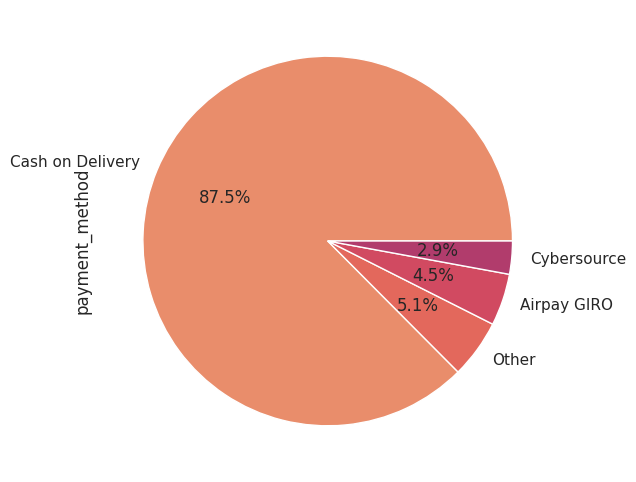

In [ ]:
top_3_values = value_counts[:3].index
df1['payment_method'] = df1['payment_method'].apply(lambda x: x if x in top_3_values else 'Other')
plt.figure(figsize=(10, 6))
palette = sns.color_palette('flare')
df1['payment_method'].value_counts().plot.pie(colors = palette, autopct = '%1.1f%%')

Trong số 32 phương thức thanh toán:
- COD được sử dụng nhiều nhất với 87.46%
- Airpay GIRO chiếm 4.54%
- Cybersource với 2.9% và một số dịch vụ trả qua thẻ ngân hàng Việt Nam ~5%

**Tương quan giữa phương thức thanh toán với tình trạng đơn hàng như thế nào?**

<Axes: xlabel='payment_method', ylabel='count'>

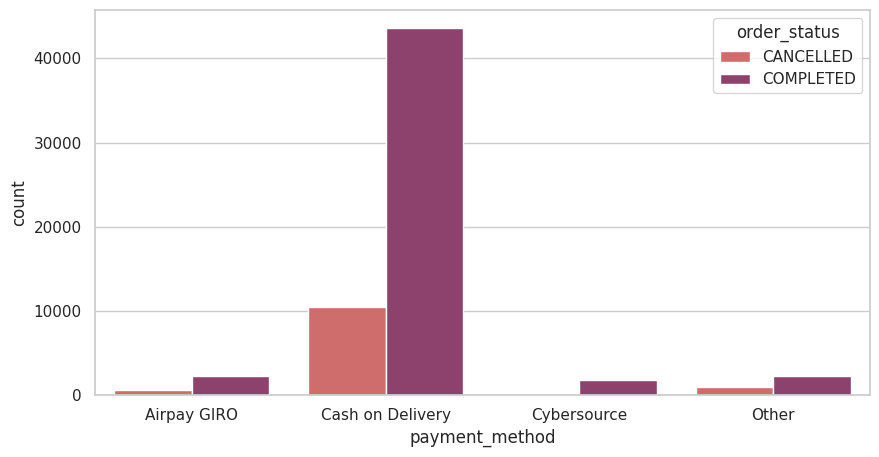

In [ ]:
plt.figure(figsize = (10, 5))
sns.countplot(x=df1['payment_method'], hue = df1['order_status'], palette='flare')

- Với các phương thức thanh toán thông qua Airpay và cổng thanh toán Cybersource có rất ít và hầu như không đơn hàng bị hủy.
- Phương thức trả sau (Cash on Delivery) có thể được xem là một trong những yếu tố tác động đến tình trạng đơn hàng, đặc biệt là các đơn hàng bị hủy.

# Về thời gian đặt hàng

<Axes: xlabel='Day', ylabel='count'>

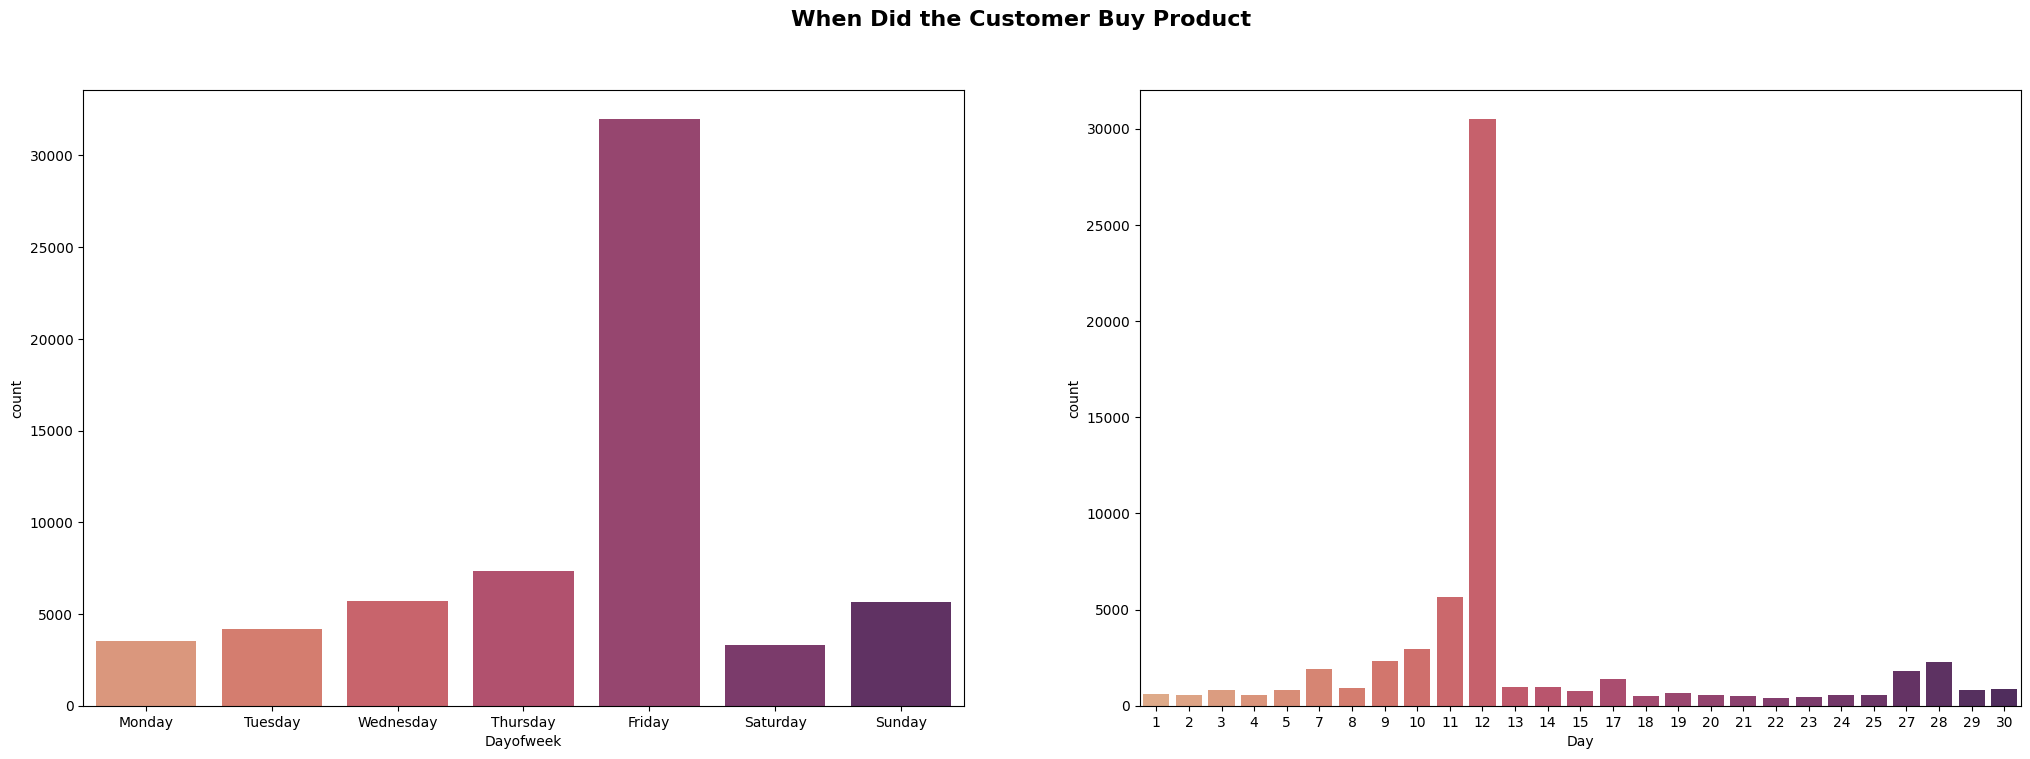

In [ ]:
#Created day
df1["created_day"] = pd.to_datetime(df1["created_day"])
df1['Day'] = df1['created_day'].apply(lambda x: x.day)
df1['Dayofweek'] = df1['created_day'].apply(lambda x: x.day_name())

fig, axes = plt.subplots(1, 2, figsize=(25,8))
axes = axes.flatten()
fig.suptitle("When Did the Customer Buy Product", weight='bold', fontsize=16)

sns.countplot(x=df1['Dayofweek'], order=['Monday', 'Tuesday', 'Wednesday', 'Thursday', 'Friday','Saturday', 'Sunday'], palette='flare', ax=axes[0])

sns.countplot(x=df1['Day'], palette='flare', ax=axes[1])

- Nhìn chung số lượng đơn hàng ở các ngày trong tuần chênh lệnh nhau không đáng kể (trung bình khoảng 5000 đơn một ngày)
Riêng **ngày thứ 6** có số lượng đơn hàng rất lớn, gấp khoảng 6 lần so với các ngày còn lại.
- Khách hàng mua sắm nhiều từ **ngày 10** đến **ngày 12** hàng tháng. Đỉnh điểm là số lượng đơn hàng bán ra vào ngày 12 đạt cực đại với hơn 30000 đơn hàng.

 -> Lý giải tại sao và đưa ra ý kiến gì về chiến lược marketing vào những ngày này.

# Về các sàn thương mại điện tử đang được sử dụng

In [ ]:
file_path = "/content/drive/MyDrive/Sample_Customore_Traffic raw.xlsx"
sheet_name = "Dataset1"
df2 = pd.read_excel(file_path, sheet_name=sheet_name)
df2

,Source / Medium,Users,New Users,Sessions,Bounce Rate,Pages / Session,Avg. Session Duration,Ecommerce Conversion Rate,Transactions,Revenue
0,google / cpc,407950,344502,723208,0.621901,3.556041,176.025681,0.009079,6566,6.656088e+09
1,youtube / social,77785,55537,163447,0.788115,2.244324,89.944740,0.005855,957,8.429079e+08
2,(direct) / (none),64653,60181,108534,0.553264,4.120340,200.429165,0.009656,1048,1.040851e+09
3,facebook / social,48721,32781,176662,0.844002,1.858996,73.206094,0.002830,500,5.344857e+08
4,youtube.com / referral,27718,17774,42464,0.639224,2.983563,148.443882,0.011963,508,4.025419e+08
...,...,...,...,...,...,...,...,...,...,...
193,www-dienmayxanh-com.cdn.ampproject.org / local...,1,0,1,1.000000,1.000000,0.000000,0.000000,0,0.000000e+00
194,xiaomiviet.vn / local_display,1,0,2,0.000000,4.500000,113.000000,0.000000,0,0.000000e+00
195,xnxx.com / local_display,1,0,2,0.500000,1.500000,6.000000,0.000000,0,0.000000e+00
196,zalo / (not set),1,1,1,1.000000,1.000000,0.000000,0.000000,0,0.000000e+00


In [ ]:
df2 = df2.drop(df2.index[-1])

In [ ]:
df2.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 197 entries, 0 to 196
Data columns (total 11 columns):
 #   Column                      Non-Null Count  Dtype  
---  ------                      --------------  -----  
 0   Source / Medium             197 non-null    object 
 1   Users                       197 non-null    int64  
 2   New Users                   197 non-null    int64  
 3   Sessions                    197 non-null    int64  
 4   Bounce Rate                 197 non-null    float64
 5   Pages / Session             197 non-null    float64
 6   Avg. Session Duration       197 non-null    float64
 7   Ecommerce Conversion Rate   197 non-null    float64
 8   Transactions                197 non-null    int64  
 9   Revenue                     197 non-null    float64
 10  Transaction-to-Users Ratio  197 non-null    float64
dtypes: float64(6), int64(4), object(1)
memory usage: 17.1+ KB


Nhận xét:
- Tất cả thông số về các nền tảng bán hàng đều là dữ liệu số (kiểu numerical)
- Tập dữ liệu không có NULL.

In [ ]:
df2.describe()

,Users,New Users,Sessions,Bounce Rate,Pages / Session,Avg. Session Duration,Ecommerce Conversion Rate,Transactions,Revenue,Transaction-to-Users Ratio
count,197.000000,197.000000,197.000000,197.000000,197.000000,197.000000,197.000000,197.000000,1.970000e+02,197.000000
mean,3334.974619,2688.741117,6393.157360,0.598403,3.289928,166.111114,0.003954,50.969543,5.079428e+07,0.008689
std,30122.423467,25300.978394,54720.604195,0.347911,3.505346,320.151245,0.015496,479.992272,4.849006e+08,0.035166
min,1.000000,0.000000,1.000000,0.000000,1.000000,0.000000,0.000000,0.000000,0.000000e+00,0.000000
25%,1.000000,0.000000,1.000000,0.357143,1.000000,0.000000,0.000000,0.000000,0.000000e+00,0.000000
50%,1.000000,0.000000,4.000000,0.571429,2.250000,68.000000,0.000000,0.000000,0.000000e+00,0.000000
75%,4.000000,2.000000,11.000000,1.000000,4.600000,237.818182,0.000000,0.000000,0.000000e+00,0.000000
max,407950.000000,344502.000000,723208.000000,1.000000,39.000000,3379.359551,0.125000,6566.000000,6.656088e+09,0.272727


Về các nền tảng:
- Trung bình khoảng 3335 user/nền tảng. Với nền tảng được nhiều khách hàng sử dụng nhất vào khoảng 407950 users.
- Các phiên giao dịch được thực hiện trung bình khoảng 50 phiên/nền tảng. Cao nhất khoảng 6566 phiên.
- Tỷ lệ thực hiện hội thoại (chat) giữa user và nền tảng bán hàng rất thấp và hầu như không có.
- Thời gian trung bình thực hiện một phiên giao dịch trên các nền tảng là 166s (3m), cao nhất khoảng 3380s (~1h).



In [ ]:
top_10_users = df2.sort_values(by='Users', ascending=False).head(10)

top_10_new_users = df2.sort_values(by='New Users', ascending=False).head(10)

df2['Transaction-to-Users Ratio'] = df2['Transactions'] / df2['Users']
top_10_ratio = df2.sort_values(by='Transaction-to-Users Ratio', ascending=False).head(10)

print("\n10 platforms with the highest number of Users:")
print(top_10_users[['Source / Medium', 'Users']])

print("\n5 platforms with the highest number of New Users:")
print(top_10_new_users[['Source / Medium', 'New Users']])

print("\n10 platform has the highest ratio between Transactions and Users:")
print(top_10_ratio[['Source / Medium', 'Transaction-to-Users Ratio']])


10 platforms with the highest number of Users:
             Source / Medium   Users
0               google / cpc  407950
1           youtube / social   77785
2          (direct) / (none)   64653
3          facebook / social   48721
4     youtube.com / referral   27718
5  m.facebook.com / referral   14373
6  l.facebook.com / referral    3661
7                zalo / zalo    2782
8        youtube / (not set)    1741
9    facebook.com / referral    1594

5 platforms with the highest number of New Users:
              Source / Medium  New Users
0                google / cpc     344502
2           (direct) / (none)      60181
1            youtube / social      55537
3           facebook / social      32781
4      youtube.com / referral      17774
5   m.facebook.com / referral      10110
7                 zalo / zalo       2400
6   l.facebook.com / referral       1712
8         youtube / (not set)        875
10  googleapis.com / referral        742

10 platform has the highest ratio between 

**TOP 10 nền tảng có số lượng người dùng cao nhất**

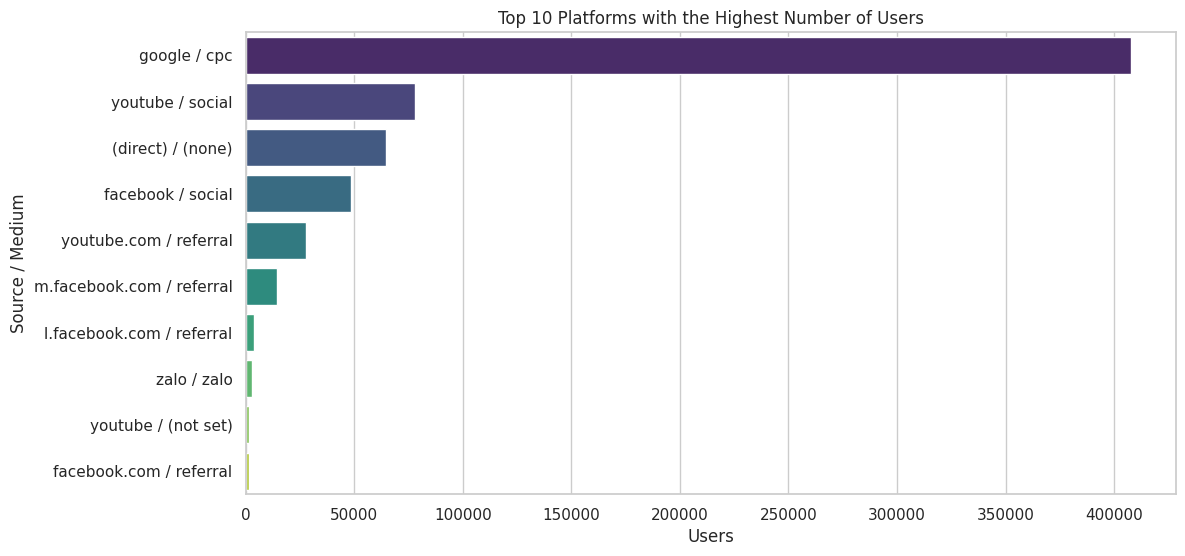

In [ ]:
plt.figure(figsize=(12, 6))
sns.barplot(data=top_10_users, x='Users', y='Source / Medium', palette='viridis')
plt.xlabel('Users')
plt.ylabel('Source / Medium')
plt.title('Top 10 Platforms with the Highest Number of Users')
plt.show()

**TOP 10 nền tảng có số lượng người dùng mới cao nhất**

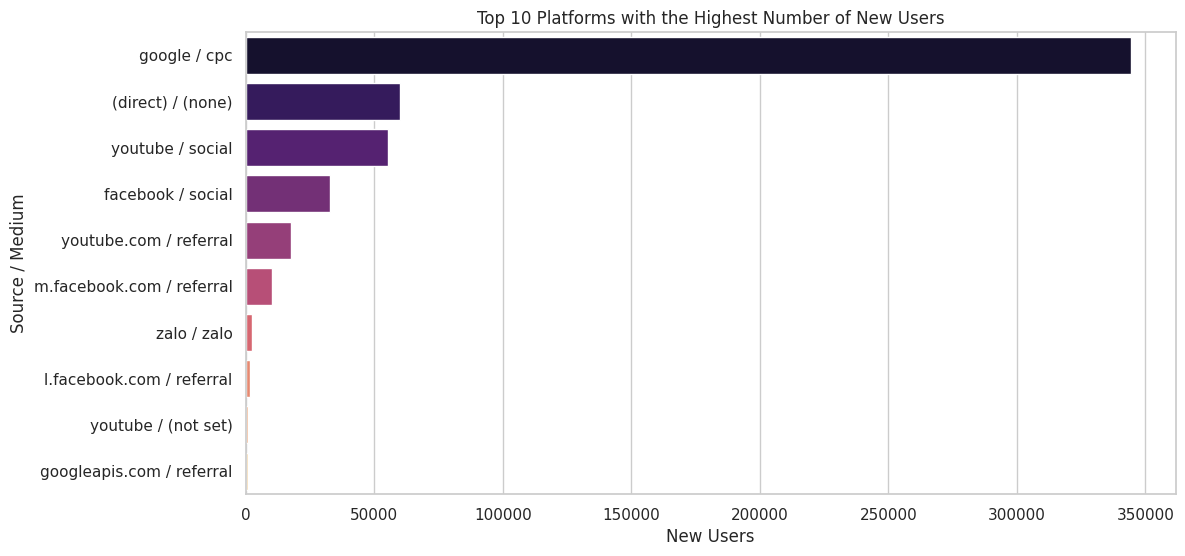

In [ ]:
plt.figure(figsize=(12, 6))
sns.barplot(data=top_10_new_users, x='New Users', y='Source / Medium', palette='magma')
plt.xlabel('New Users')
plt.ylabel('Source / Medium')
plt.title('Top 10 Platforms with the Highest Number of New Users')
plt.show()

Nhận xét:
- Các nền tảng phổ biến với lượng user cao và càng ngày càng tăng thêm lần lượt là: Google, youtobe, website trực tiếp, facebook, zalo và các liên kết được đề xuất từ những nền tảng này.

**TOP 10 nền tảng có tỷ lệ giao dịch trên người dùng cao nhất**

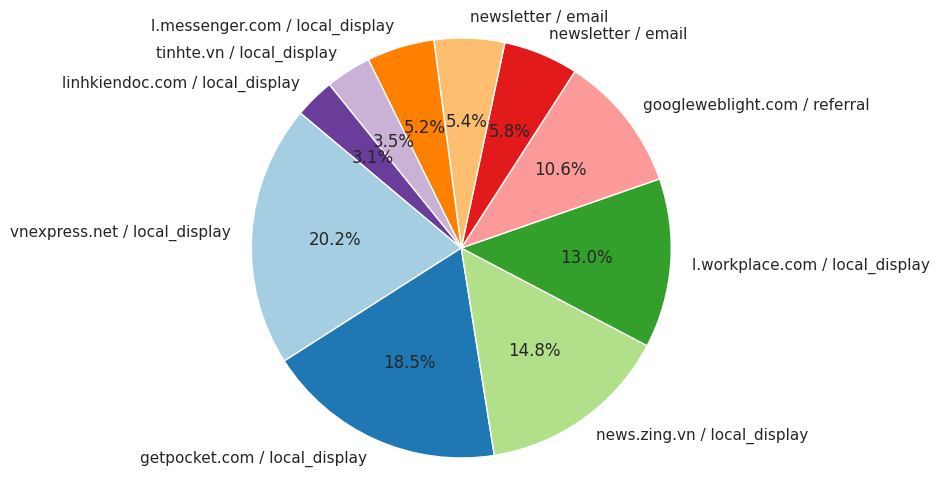

In [ ]:
ratios = top_10_ratio['Transaction-to-Users Ratio']
platforms = top_10_ratio['Source / Medium']

plt.figure(figsize=(10, 6))
plt.pie(ratios, labels=platforms, autopct='%1.1f%%', startangle=140, colors=plt.cm.Paired(range(len(ratios))))
plt.axis('equal')
plt.show()

- Từ biểu đồ trên có thể thấy 10 nền tảng rất tiềm năng với tỷ lệ giao dịch cao: vnexpress, getpocket, news.zing, Iworkplace,...

 -> Có thể tăng cường quảng bá ở các nền tàng này trong lương lai.

#**TỔNG KẾT VÀ CHIẾN LƯỢC**

**1. Khách hàng**
- Trung bình trong một tháng, toàn sàn thương mại có khoảng 30500 khách hàng. Trong đó có khoảng 17% lượng khách hàng giá trị cao là những khách hàng thường xuyên mua sắm và đóng góp lớn vào doanh số.
- Những khách hàng thường xuyên mua sắm vào thứ 5, thứ 6 và ngày 12 hàng tháng.

**2. Phí giao hàng**
- Trung bình phí giao hàng ~10.000 đồng/đơn hàng.
- Có các đơn hàng phí ship cao từ 40.000 - 400.000 đồng/ đơn hàng chiếm tỷ lệ nhỏ khoảng 6%.
- Vấn đề phí giao hàng cao không ảnh hưởng đáng kể đến việc đơn hàng bị hủy.

**3. Đơn hàng**
- 80% tỷ lệ đơn hàng được hoàn thành và 20% tỷ lệ đơn hàng bị hủy.

**4. Phương thức thanh toán**
- COD (Cash on Delivery) được sử dụng nhiều nhất với 87.46% và còn lại là các phương thức trả trước thông qua Airpay, Cybersource,...
- Theo phân tích cho thấy trong số 20% đơn hàng bị hủy, phần lớn được thực hiện thanh toán COD. Có thể xem đây là một trong những nguyên nhân khách hàng hủy giao dịch.

**5. Giá sản phẩm**
- Giá bán ra của một đơn hàng trung bình khoảng 150.000 đồng, chênh lệch so với giá niêm yết hoảng 83.000 đồng.

**6. Nền tảng bán hàng**
- Nền tảng bán hàng chính với số lượng users rất đông: Google, Youtobe, Facebook, Zalo,...
- Một số các nền tảng/website tiềm năng với tỷ lệ giao dịch cao: VNExpress, GetPocket, NewsZing,..


**7. Chiến lược**
- Tập trung hơn vào nhóm các khách hàng giá trị cao(tiềm năng): quảng bá sản phẩm dưới hình thức quảng cáo, tặng voucher, giảm giá, làm thẻ thành viên,... vào các ngày 10, 11 hàng tháng và thứ 6 hàng tuần.
- Khuyến khích thanh toán đơn hàng trả trước thông qua thẻ ngân hàng và các cổng thanh toán dịch vụ trực tuyến, ... Để giảm thiểu tỷ lệ đơn hàng bị hủy.
- Điều chỉnh chênh lệch giữa giá niêm yết(giá thực) và giá bán sản phẩm để tối ưu hóa doanh thu và lợi nhuận.
- Đầu tư quảng bá vào một số website tiềm năng để tiếp cận tối đa nhóm khách hàng thân thiện.
- Tăng tỷ lệ tương tác giữa nền tảng/ nhà bán hàng với khách hàng: thông qua chat, tổng đài tư vấn, diễn đàn đánh giá sản phẩm,..
- Nâng cấp, bảo trì hệ thống, website, diễn đàng để hoạt động giao dịch mua bán được diễn ra nhanh chóng, thuận thiện.

**8. Theo dõi và Dự đoán**
- Theo dõi và thu thập thêm các dữ liệu mua sắm của khách hàng để đưa ra dự đoán xu hướng và doanh thu trong tương lai.




